In [2]:
import pandas as pd
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data
- data: https://zenodo.org/record/2594557#.XRDedJNKhp9

## Research
- https://arxiv.org/pdf/1802.08452.pdf
- https://web.stanford.edu/~jlmcc/papers/PDP/Chapter3.pdf
- https://www.kdd.org/kdd2018/files/deep-learning-day/DLDay18_paper_27.pdf
- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
- https://nipunbatra.github.io/blog/2017/recommend-keras.html


In [4]:
df = pd.read_csv('datasets/spotify_dataset.csv',error_bad_lines=False,warn_bad_lines=False)

In [5]:
df.rename(index=str, columns={
    ' "artistname"': "artist",
    ' "trackname"': "trackname",
    ' "playlistname"': "playlistname"
},inplace=True)

In [6]:
df.shape

(12891680, 4)

---

In [7]:
df.columns

Index(['user_id', 'artist', 'trackname', 'playlistname'], dtype='object')

In [8]:
df.nunique()

user_id           15918
artist           289821
trackname       2032044
playlistname     157504
dtype: int64

In [9]:
Counter(df.artist).most_common(10)

[('Daft Punk', 36086),
 ('Coldplay', 35485),
 (nan, 33568),
 ('Radiohead', 31429),
 ('The Rolling Stones', 30832),
 ('Kanye West', 29111),
 ('JAY Z', 28928),
 ('Eminem', 28894),
 ('Queen', 28079),
 ('David Bowie', 27802)]

In [10]:
df.isna().sum()

user_id             0
artist          33568
trackname          85
playlistname     1246
dtype: int64

In [11]:
df[df.artist.isna()].head(20)

,user_id,artist,trackname,playlistname
769,07f0fc3be95dcd878966b1f9572ff670,NaN,07 - echoes,Starred
2606,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,Im Not Okay (I Promise) ~ My Chemical Romance,ngt emo eller
2607,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,Just The Girl - The Click Five Cover,ngt emo eller
2608,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,Low - Sleeping With Sirens Cover,ngt emo eller
2609,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,Pierce The Veil - -Just The Way You Are- Lyric...,ngt emo eller
2610,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,Pierce The Veil - Disasterology ( Lyrics ),ngt emo eller
2612,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,live and let die- paul mccartney,ngt emo eller
2613,c5cdf06b5f1836006ef2a2fe4f5ff103,NaN,patty walters - My Chemical Romance 'TEENAGERS...,ngt emo eller
16360,f4052aabcb90ac2bc768b14946255b45,NaN,Deluge 2.mp3,mcfinal
16361,f4052aabcb90ac2bc768b14946255b45,NaN,Golden Brown 2.mp3,mcfinal


In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(12856838, 4)

In [14]:
df.isna().sum()

user_id         0
artist          0
trackname       0
playlistname    0
dtype: int64

## EDA
- Playlist size
- Playlist per user

In [15]:
df.head()

,user_id,artist,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010


In [17]:
df['user_playlistname'] = df.user_id + '--' + df.playlistname

In [18]:
df.head()

,user_id,artist,trackname,playlistname,user_playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010


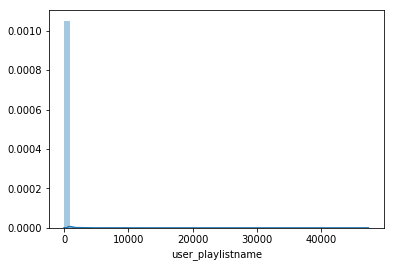

In [19]:
sns.distplot(df.user_playlistname.value_counts())

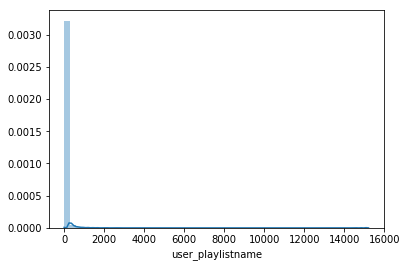

In [20]:
sns.distplot(df[df['playlistname'] != 'Starred'].user_playlistname.value_counts())

In [56]:
df.user_playlistname.value_counts()

4398de6902abde3351347b048fcdc287Starred                                            47362
68756b4d60b6fac27789e85c2b63d1c6Starred                                            18509
c410ee930bd5f0e4893632503ec17b05Starred                                            18082
f2604a69836c94d00fcd11dd602944fceverything                                         15213
6b85a8076b4f3b1036ef15f09e2feeebGeneros                                            14854
00dd7fde8040db835d917e077bb47e4bStarred                                            13635
1c43b609f0b4a55de35803000c86ade0Starred                                            13053
cba242053229db043497e4dd284b025fStarred                                            11195
e3833c156aef7b25ba9d8837341a99bbAll Live Files                                     10989
8ece433d541d9fac7fbd7c0c6082c7a6Musica!                                            10154
ce7eab9cbb66a49a8b71c751458e8663Starred                                            10130
4398de6902abde3351347

# MORE DATA CLEANING

In [21]:
df['playlist_length'] = df.groupby('user_playlistname')['user_playlistname'].transform('count')

In [22]:
df.head()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_length
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67


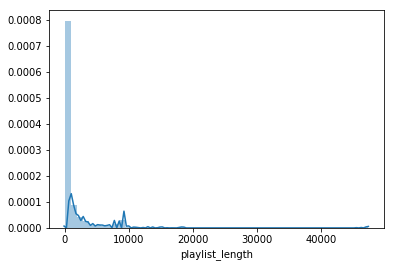

In [23]:
sns.distplot(df.playlist_length)

In [62]:
#add column for order in playlist
#trim down to only smaller playlists

In [24]:
#12.8 million
df.shape[0]

12856838

In [25]:
#12.8 million
df.loc[(df.playlist_length >= 3)].shape[0]

12838954

In [26]:
#6.4 million
df = df.loc[(df.playlist_length <= 200) & (df.playlist_length >= 3)]

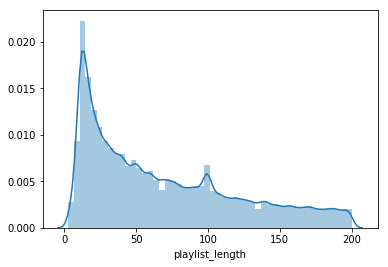

In [27]:
sns.distplot(df.playlist_length)

In [28]:
Counter(df.playlistname).most_common(50)

[('Starred', 173167),
 ('Liked from Radio', 105288),
 ('Favoritas de la radio', 18767),
 ('Christmas', 13674),
 ('My Shazam Tracks', 10601),
 ('Country', 7683),
 ('Rock', 7607),
 ('Chill', 7235),
 ('2014', 7112),
 ('2013', 5871),
 ('Running', 5573),
 ('New Playlist', 5428),
 ('Classical', 5277),
 ('Coldplay', 4821),
 ('Jazz', 4809),
 ('Oldies', 4328),
 ('Last.fm Recommendations', 4306),
 ('Rap', 4258),
 ("80's", 4187),
 ('90s', 3886),
 ('Dance', 3875),
 ('Party', 3805),
 ('Muse', 3751),
 ('Workout', 3741),
 ('2015', 3701),
 ('U2', 3652),
 ('80s', 3621),
 ('Eminem', 3529),
 ('Relax', 3527),
 ('Hip Hop', 3438),
 ('2012', 3314),
 ('Covers', 3279),
 ('Soundtracks', 3232),
 ('Reggae', 3173),
 ('Radiohead', 3112),
 ('Mis pistas de Shazam', 3100),
 ('Pop', 2993),
 ('Blues', 2949),
 ('Indie', 2895),
 ('Queen', 2866),
 ('Summer', 2841),
 ('Linkin Park', 2748),
 ('Classics', 2628),
 ('Daft Punk', 2582),
 ('Foo Fighters', 2571),
 ('Disney', 2550),
 ('Curtida no Rádio', 2545),
 ('Work', 2519),
 ('

In [29]:
not_real_playlist = [
    'Starred',
    'Liked from Radio',
    'Favoritas de la radio',
    'My Shazam Tracks',
    'Last.fm Recommendations',
    'Mis pistas de Shazam',
    'Curtida no Rádio'
]

In [30]:
df = df[df.playlistname.isin(not_real_playlist) == False]

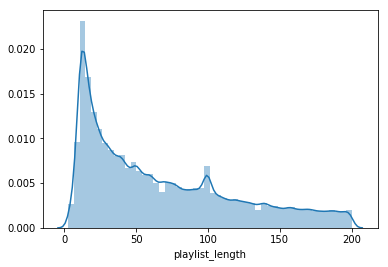

In [31]:
sns.distplot(df.playlist_length)

In [32]:
#playlist_position column

In [33]:
df.head()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_length
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67


In [34]:
df['artist_trackname'] = df['artist'] + '--' + df['trackname']

In [35]:
df.head()

,user_id,artist,trackname,playlistname,user_playlistname,playlist_length,artist_trackname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67,Elvis Costello--(The Angels Wanna Wear My) Red...
1,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,"(What's So Funny 'Bout) Peace, Love And Unders...",HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67,Elvis Costello & The Attractions--(What's So F...
2,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67,Tiffany Page--7 Years Too Late
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67,Elvis Costello & The Attractions--Accidents Wi...
4,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010,9cc0cfd4d7d7885102480dd99e7a90d6--HARD ROCK 2010,67,Elvis Costello--Alison


### The faster way

In [37]:
df['playlist_position'] = df.groupby('user_playlistname').cumcount(ascending=True)